## BE188 Project

### Predicting breast cancer using classification on different blood-measurements

Farnaz Mohammadi


#### Importing the data and preparing it for calculations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns; sns.set()
%matplotlib inline 

mat = pd.read_csv('dataR2.csv')
mat

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
5,49,22.854458,92,3.226,0.732087,6.8317,13.679750,10.31760,530.410,1
6,89,22.700000,77,4.690,0.890787,6.9640,5.589865,12.93610,1256.083,1
7,76,23.800000,118,6.470,1.883201,4.3110,13.251320,5.10420,280.694,1
8,73,22.000000,97,3.350,0.801543,4.4700,10.358725,6.28445,136.855,1
9,75,23.000000,83,4.952,1.013839,17.1270,11.578990,7.09130,318.302,1


### Preparing the data for binary classification

number of healthy: 52
the number of patients: 64


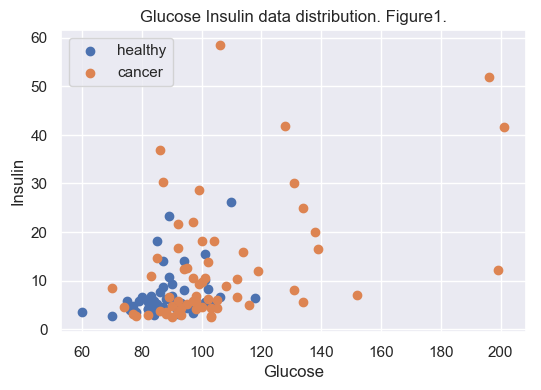

In [2]:
from sklearn.preprocessing import StandardScaler
Data = mat.copy()

Data.drop('Classification', axis=1, inplace=True)

# separate data sets
healthy = Data[mat['Classification'] == 1]
cancer = Data[mat['Classification'] == 2]

print('number of healthy:', len(healthy))
print('the number of patients:', len(cancer))

# Putting 0 for cancer patients and 1 for healthy ones in the output vector
y_healthy = len(healthy)*[1]
y_cancer = len(cancer)*[0]


sData = StandardScaler().fit_transform(Data)
y = y_healthy + y_cancer
y = np.asarray(y)

#print('s data', sData)
#print('y data', y)
#print(sData.shape)
#print(y.shape)


# Visualizing the data just to show they are not distinguishable without a kind of transformation
plt.figure(dpi = 100)
plt.scatter(healthy['Glucose'], healthy['Insulin'], label = 'healthy')
plt.scatter(cancer['Glucose'], cancer['Insulin'], label = 'cancer')
plt.ylabel('Insulin')
plt.title('Glucose Insulin data distribution. Figure1.')
plt.xlabel('Glucose')
plt.legend()


## Removing some features from the data matrix
Based on the paper, they just have used four features including BMI, Age, Glucos and Resistin. We will do with both groups of data. In the following cell, we will create the reduced matrix of data with those four features.


In [3]:
reduced_data = mat.copy()

reduced_data.drop('Classification', axis=1, inplace=True)
reduced_data.drop('Insulin', axis=1, inplace=True)
reduced_data.drop('Leptin', axis=1, inplace=True)
reduced_data.drop('HOMA', axis=1, inplace=True)
reduced_data.drop('Adiponectin', axis=1, inplace=True)
reduced_data.drop('MCP.1', axis=1, inplace=True)
print(reduced_data)
reduced_data = StandardScaler().fit_transform(reduced_data)

     Age        BMI  Glucose  Resistin
0     48  23.500000       70   7.99585
1     83  20.690495       92   4.06405
2     82  23.124670       91   9.27715
3     68  21.367521       77  12.76600
4     86  21.111111       92  10.57635
5     49  22.854458       92  10.31760
6     89  22.700000       77  12.93610
7     76  23.800000      118   5.10420
8     73  22.000000       97   6.28445
9     75  23.000000       83   7.09130
10    34  21.470000       78   6.92000
11    29  23.010000       82   4.58000
12    25  22.860000       82   5.14000
13    24  18.670000       88   6.85000
14    38  23.340000       75   9.35000
15    44  20.760000       86   7.64000
16    47  22.030000       84   3.32000
17    61  32.038959       85  13.68392
18    64  34.529723       95   6.70188
19    32  36.512637       87  17.10223
20    36  28.576676       86   9.15390
21    34  31.975015       87   5.62592
22    29  32.270788       84  24.60330
23    35  30.276817       84  16.43706
24    54  30.483158      

## Running PCA on the data

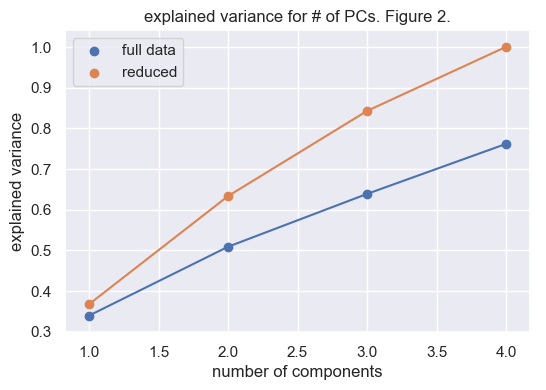

In [4]:
from sklearn.decomposition import PCA


def pca_fit(X, n):
    """ a function to find the best number of components in PCA
    based on explained variance ratio
    
    args:
    ----------
        X: Data matrix
        n: number of components
        
    returns:
    ---------
        explained variance ratio for n number of components
    """
    pca = PCA(n_components = n)
    pca.fit(X)
    return pca.explained_variance_ratio_.sum()


R2X = [] 
reduced_r2x = []
max_comp = 5
for i in range(1,max_comp):
    r2x = pca_fit(sData, i)
    temp = pca_fit(reduced_data,i)
    R2X.append(r2x)
    reduced_r2x.append(temp)
plt.figure(dpi = 100)   
plt.plot(range(1,max_comp), R2X)
plt.plot(range(1,max_comp), reduced_r2x)
plt.scatter(range(1,max_comp), R2X, label = 'full data')
plt.scatter(range(1,max_comp), reduced_r2x, label = 'reduced')
plt.title('explained variance for # of PCs. Figure 2.')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.legend()
plt.show()


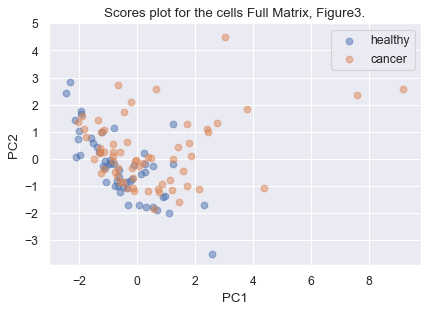

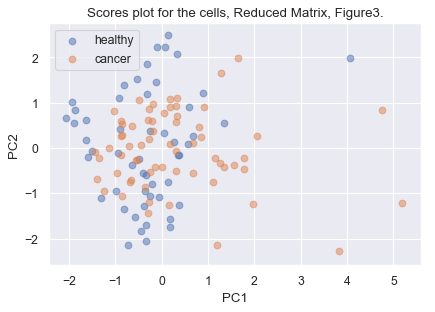

In [5]:
pca = PCA(n_components = 5)
pca.fit(sData)

pca2 = PCA(n_components = 4)
pca2.fit(reduced_data)

a = len(healthy)

############################################
# Plotting the scores based on the type
############################################

plt.figure(dpi = 80)
plt.scatter(pca.transform(sData)[0:a,0], pca.transform(sData)[0:a,1], alpha = 0.5, label = 'healthy')
plt.scatter(pca.transform(sData)[a:,0], pca.transform(sData)[a:,1], alpha = 0.5, label = 'cancer')
plt.legend()
plt.title('Scores plot for the cells Full Matrix, Figure3.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(dpi = 80)
plt.scatter(pca2.transform(reduced_data)[0:a,0], pca2.transform(reduced_data)[0:a,1], alpha = 0.5, label = 'healthy')
plt.scatter(pca2.transform(reduced_data)[a:,0], pca2.transform(reduced_data)[a:,1], alpha = 0.5, label = 'cancer')
plt.legend()
plt.title('Scores plot for the cells, Reduced Matrix, Figure3.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

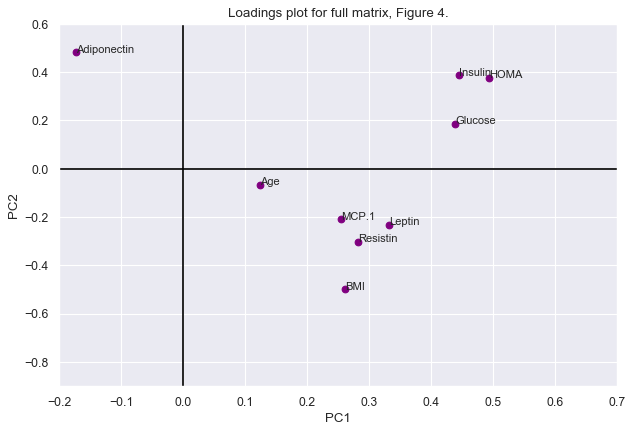

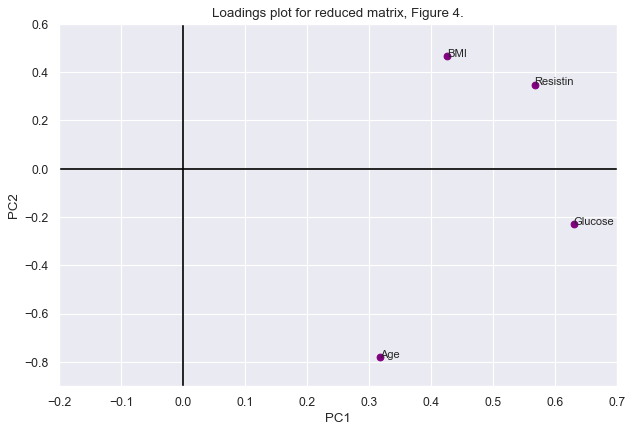

In [6]:
plt.figure(figsize =(9,6), dpi = 80)
plt.scatter(pca.components_[0], pca.components_[1], color = 'purple')
plt.title('Loadings plot for full matrix, Figure 4.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-0.2, 0.7])
plt.ylim([-0.9, 0.6])
plt.axhline(0, color =  'black')
plt.axvline(0, color = 'black')

n = ['Age','BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

for i, txt in enumerate(n):
    plt.annotate(txt, (pca.components_[0][i], pca.components_[1][i]))

    
plt.figure(figsize =(9,6), dpi = 80)
plt.scatter(pca2.components_[0], pca2.components_[1], color = 'purple')
plt.title('Loadings plot for reduced matrix, Figure 4.')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xlim([-0.2, 0.7])
plt.ylim([-0.9, 0.6])
plt.axhline(0, color =  'black')
plt.axvline(0, color = 'black')

n = ['Age','BMI', 'Glucose', 'Resistin']

for i, txt in enumerate(n):
    plt.annotate(txt, (pca2.components_[0][i], pca2.components_[1][i]))

## ROC function
To evaluate the quality of classifiers.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.metrics import confusion_matrix


def ROC(sData, y, classifier):
    '''
    A function to calculate the ROC curve elements.
    
    It takes in the input data matrix, the label output vector, and the classifier. 
    The cross validation method is 4-fold cross validation, and we scale (normalize) the data 
    after splitting into test and train sets. Ture positive and false positive rates are calculated 
    along with AUC, and we have everything to plot the ROC curve. This function could be used for all
    of our sklearn classifiers, since they all have similar syntax for fitting and predicting.
    
    arg: 
    -----------
        sData (matrix): the data matrix we want to apply the svm to it.
        y (vector of zeros/ones): output labels corresponding to data matrix observations
        classifier (object): the model that could have been built with any classifier, such as SVM, PLS-DA, etc. 
        
    returns:
    ------------
        mean_auc (float): the mean of Area Under the Curve, which is a measure of quality
        std_auc (float): standard deviation of AUC
        mean_falsePos (float): false positive mean based on the prediction of model on test data
        mean_truePos (float): true positive mean based on the model prediction on test data
        conf (2x2 matrix): confusion matrix including the FP, FN, TP, TN numbers in the dataset 
        
        '''
    random_state = np.random.RandomState(0)
    cv = StratifiedKFold(n_splits = 2)

    truePosRate = []
    aucs = []
    thresh = []
    mean_falsePos = np.linspace(0,1,100)
    

    conf = np.zeros((2,2))
    for train, test in cv.split(sData, y):

        
        # Normalizing the data matrix
        train_data= scale(sData[train])
        test_data = scale(sData[test])
        
        # probability of the predicted vector that they belong to the two labels 
        probas_ = classifier.fit(train_data, y[train]).predict_proba(test_data)
    
        # calculate FP and TP curve and AUC
        FPR, TPR, thresholds = roc_curve(y[test], probas_[:,1])
        truePosRate.append(interp(mean_falsePos, FPR, TPR))
        truePosRate[-1][0] = 0.0
        roc_auc = auc(FPR, TPR)
        aucs.append(roc_auc)
        
        # Find optimal threshold 
        opt = Find_Optimal_Cutoff(y[test], probas_[:,1])
        thresh.append(opt)
        
        # finding the predicted vector output
        pr = np.zeros((probas_[:,1].size))
        for i in range(probas_[:,1].size):
            if probas_[i,1] > opt:
                pr[i] =1
            else:
                pr[i]=0
               
        ##########################
        ##### The confusion matrix
        ##########################
        confusion_mat = confusion_matrix(y[test], pr)
        conf +=confusion_mat

        
    mean_truePos = np.mean (truePosRate, axis = 0)
    mean_truePos[-1] = 1.0
    mean_auc = auc(mean_falsePos, mean_truePos)
    std_auc = np.std(aucs)
    
    return mean_auc, std_auc, mean_falsePos, mean_truePos, truePosRate, conf

def find_max(mean_auc):
    the_one_arg = np.argmax(mean_auc)
    the_one_val = np.max(mean_auc)
    print('the_one_arg', the_one_arg)
    print('the_one_val', the_one_val)
    return the_one_arg, the_one_val

def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Args:
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns:
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    return list(roc_t['threshold']) 

## Plot ROC

In [8]:
def plot_ROC(mean_auc, std_auc, mean_falsePos, mean_truePos, truePosRate, mode, reg):
    '''
    This function plots the ROC curve with mean FPrate and TPrate and std
    
    args:
    -----------
        the first four arguments are the output of ROC function,
        mode (str): whether it is the full matrix or the reduced one
        reg (str): which type of classification we are using (i.e., Logistic Regression/SVM/PLS-DA)
        
    returns:
    -----------
        nothing, just plots the ROC curve with standard deviation.
        '''
    plt.figure(dpi = 100)
    plt.plot([0, 1], [0, 1], linestyle = '--', lw = 2, color = 'b',  alpha = 0.8)
    plt.plot(mean_falsePos, mean_truePos, color = 'g', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc))
    std_tpr = np.std(truePosRate, axis=0)

    tprs_upper = np.minimum(mean_truePos + std_tpr, 1)
    tprs_lower = np.maximum(mean_truePos - std_tpr, 0)
    plt.fill_between(mean_falsePos, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate (1-spec.)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.title('{}: ROC of {} matrix data'.format(reg, mode))
    plt.legend()
    plt.show()

## 1. Logistic Regression

As the first approach, we use Logistic Regression.
We could do the cross-validation on the Solver of the Logistic Regression to find the best optimizer.


In [9]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, cross_validation
from sklearn.cross_decomposition import PLSRegression


# The eaasiest way to get the model and its scores with a defined and ready
#cross-validation function with 20-fold cross

pred_logistic = cross_validation.cross_val_predict(LogisticRegression(), sData, y, cv = 20)
print('the score with 20 folds will be ', metrics.accuracy_score(y, pred_logistic))


the score with 20 folds will be  0.7413793103448276


C:\Users\farna\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LR accuracy on test set for full matrix with solver lbfgs is 0.81
LR accuracy on test set for paper_reduced matrix with solver lbfgs is 0.81


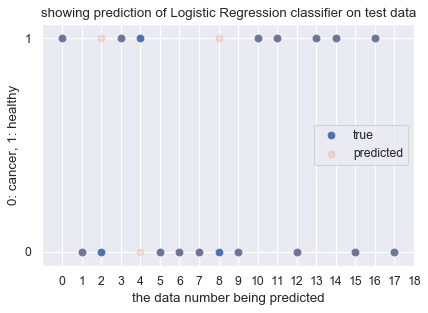

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale


def Logistic_reg(Data, y, solver):
    '''This function takes the data matrix, binary output vector, and the solver of the Logistic Regression Classifier
    and returns the accuracy of the classifier for each solver.
    
    In this function, we use train_test_split function to cross validate, and use 15% of the data for testing
    and 85% for training.
    
    args:
    ------------
        Data (np.ndarray) : the matrix of observations and features
        y (1darray) : a vector of zeros and ones corresponding to the data matrix
        solver (string) : optimizer functions of Logistic Regression
    
    Returns:
    -----------
        accuracy (float): The accuracy of prediction based on model.score which is one of the attributes 
        of Logistic Regression built-in function.
        y_pred (list of 0s or 1s): the predicted output on test set
        y_test (list of 0s or 1s): the test output 
        
        *** since if we put random_state = 0, all the solvers give the same results, I am returning y_test and y_pred
        I mean the sets are the same for each time it enters the function.
        
    '''
    # First split the train and test dataset  
    X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.15, random_state = 0)
    logistc_regression = LogisticRegression(solver = solver)

    # Then we do the scaling (Normalizing the data)
    X_train = scale(X_train)
    X_test = scale(X_test)

    # Running the model
    logistc_regression.fit(X_train, y_train)

    # predicting the output as 
    y_pred = logistc_regression.predict(X_test)
    accuracy = logistc_regression.score(X_train, y_train)
    
    
    return accuracy, y_pred, y_test


sol = 'lbfgs'
ac , y_pred, y_test= Logistic_reg(sData, y, sol)
ac_, y_pred_, y_test_ = Logistic_reg(reduced_data, y, sol)


#solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
#ac = []
#for sol in solver:
#    temp_ac, y_pred, y_test = Logistic_reg(sData, y, sol)
#    ac.append(temp_ac)
    
#plt.scatter([1,2,3,4,5], ac)
#plt.xticks([1,2,3,4,5], solver)
#plt.show()
print('LR accuracy on test set for full matrix with solver {} is {:.2f}'.format(sol, ac))
print('LR accuracy on test set for paper_reduced matrix with solver {} is {:.2f}'.format(sol, ac_))

plt.figure(dpi = 80)
plt.scatter(np.arange(len(y_test)), y_test, label = 'true')
plt.scatter(np.arange(len(y_test)), y_pred, alpha = 0.2, label = 'predicted')
plt.yticks([0,1])
plt.xticks(range(0,19))
plt.ylabel('0: cancer, 1: healthy')
plt.xlabel('the data number being predicted')
plt.legend()
plt.title('showing prediction of Logistic Regression classifier on test data')
plt.show()




### As another indicator of classification quality, we could plot the ROC curve and find the confusion matrix
Here we have full (incuding 9 features) and reduced (including 4 feaures) of the data matrix, we could see that however the PCA results were quite different, the ROC curve is not significantly different. This means although by reducing the dimenisionality of the matrix, the variance inside the X matrix has changed, but the covariance of X and the labels has not changed significantly.

confusion matrix for full variables
 [[44. 20.]
 [14. 38.]]
confusion matrix for 4 variables
 [[49. 15.]
 [13. 39.]]


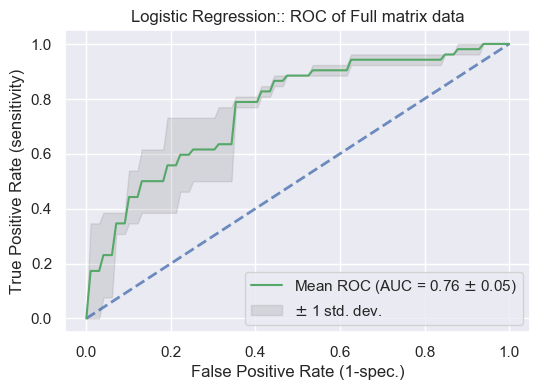

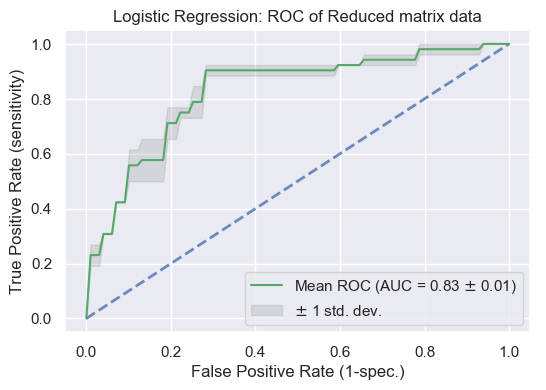

In [11]:
classifier = LogisticRegression()

mean_auc, std_auc, mean_falsePos, mean_truePos, truePosRate, conf= ROC(sData, y, classifier)
mean_auc_r, std_auc_r, mean_falsePos_r, mean_truePos_r, truePosRate_r, conf_r = ROC(reduced_data, y, classifier)
print('confusion matrix for full variables\n', conf)
print('confusion matrix for 4 variables\n', conf_r)


plot_ROC(mean_auc, std_auc, mean_falsePos, mean_truePos, truePosRate, mode = 'Full', reg = 'Logistic Regression:')
plot_ROC(mean_auc_r, std_auc_r, mean_falsePos_r, mean_truePos_r, truePosRate_r, mode = 'Reduced', reg = 'Logistic Regression')


## PLS-DA

We loop over different number of components, to see how many components gives a better result

0.9967652495378928


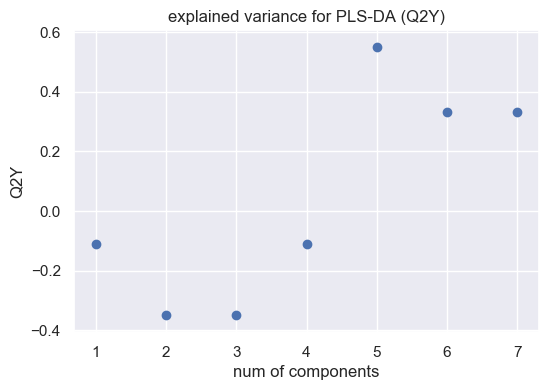

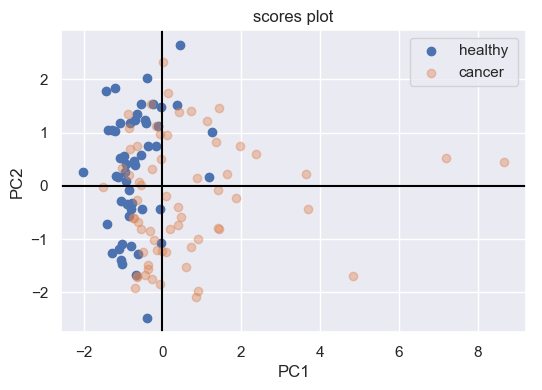

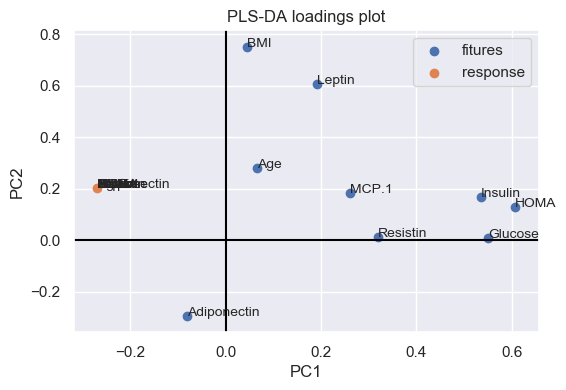

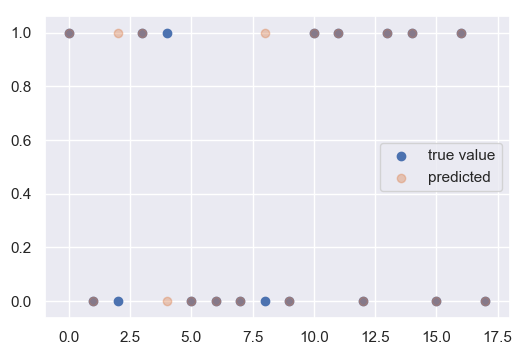

In [12]:
# Answer
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split


############################
#find best num of components
############################

def R_squared(predicted_Y, actual_Y):
    difference = []
    
    for i in range(len(actual_Y)):
        b = (predicted_Y[i] - actual_Y[i])**2
        difference.append(b)
    sum_of_diff = np.sum(difference)
    a = np.sum(predicted_Y**2)
    c = ((np.sum(predicted_Y))**2) / len(actual_Y)
    
    return 1- (sum_of_diff/(a - c))

#################################
##### Testing the R_squared function
#################################
x = np.asarray([1.2, 1.4, 2, 5, 6.5])
y_ = np.asarray([1.3, 1.5, 1.9, 4.8, 6.5])

testing = R_squared(y_,x)
print(testing) # 0.99 

##################################


def plsr_fit(X, y, n):
    """ a function to find the best number of components in PLSR, 
    Args:
    -------
    X (matrix): input data
    y (vecotr): output labels 
    n (int): the number of components
    
    Returns:
    --------
    Q2Y (float): the measure of explained covariance
    Y_pred (vector): the predicted labels (they are float, and need to be categorized by a threshold)
    y_test (vector): vector of true labels (0/1)
    """
    plsr = PLSRegression(n_components = n)
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=0)
    
    x_train = scale(x_train)
    x_test = scale(x_test)
    
    plsr.fit(x_train,y_train)
    Y_pred = plsr.predict(x_test)

    y_pred = np.asarray(Y_pred)
    y_test = np.asarray(y_test)
    
    # finding the threshold to separate labels
    threshold_ = Find_Optimal_Cutoff(y_test, Y_pred)

    y_pred = np.squeeze(y_pred)
    temp = np.zeros((y_test.shape))
    
    # assigning labels to the predicted output
    for i in range(y_pred.size):
        if y_pred[i] >= threshold_:
            temp[i] = 1
        else:
            temp[i] = 0
        
    q2y = R_squared(temp, y_test)
    
    return q2y, y_test, temp


r2y = []
for i in range(1,8):
    var, y_test, temp = plsr_fit(sData, y, i)
    r2y.append(var)
    

plt.figure(dpi = 100)
plt.scatter(range(1, 8), r2y)
plt.title('explained variance for PLS-DA (Q2Y)')
plt.xlabel('num of components')
plt.ylabel('Q2Y')

plt.show()

###########
#Score plot
###########
plsr = PLSRegression(n_components = 5)
plsr.fit(sData, y)

plt.figure(dpi = 100)
plt.scatter(plsr.x_scores_[0:a,0], plsr.x_scores_[0:a,1], label = 'healthy ')
plt.scatter(plsr.x_scores_[a:,0], plsr.x_scores_[a:,1], alpha = 0.4, label = 'cancer')
plt.title('scores plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axhline(0, color =  'black')
plt.axvline(0, color = 'black')
plt.legend()
plt.show()
n = ['Age','BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']

plt.figure(dpi = 100)
plt.grid(True)
plt.scatter(plsr.x_loadings_[:,0], plsr.x_loadings_[:,1], label = 'fitures')
plt.scatter(plsr.y_loadings_[:,0], plsr.y_loadings_[:,1], label = 'response')
plt.xlabel('PC1')
plt.legend()
plt.ylabel('PC2')
plt.title('PLS-DA loadings plot')
plt.axhline(0, color =  'black')
plt.axvline(0, color = 'black')

for i, txt in enumerate(n):
    plt.annotate(txt, (plsr.y_loadings_[:,0], plsr.y_loadings_[:,1]))
    plt.annotate(txt, (plsr.x_loadings_[i,0], plsr.x_loadings_[i,1]))
plt.show()
    
        
plt.figure(dpi = 100)
plt.scatter(range(y_test.size), y_test, label = 'true value')
plt.scatter(range(y_test.size), temp, label = 'predicted', alpha = 0.4)
plt.legend()
plt.show()


## SVM

[0.45007770007770004, 0.7964257964257964, 0.39724164724164723, 0.6977466977466977]
the confusion matrix 
 [[41. 23.]
 [20. 32.]]


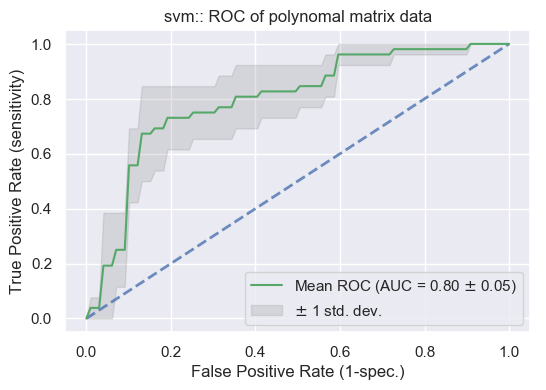

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp


###################################
# Polynomial with different degrees
###################################

m_auc, st_auc, m_falsePos, m_truePos, TruePosRate = [], [], [], [], []
deg = [2,3,4,5]
for degree in deg:
    classifier_svm = svm.SVC(kernel = 'poly', degree = degree , C = 1000, probability=True)
    temp1, temp2, m_fPos, m_tPos, TPosRate, confusion = ROC(reduced_data, y, classifier_svm)
    m_auc.append(temp1)
    st_auc.append(temp2)
    m_falsePos.append(m_fPos)
    m_truePos.append(m_tPos)
    TruePosRate.append(TPosRate)
print(m_auc)  
print('the confusion matrix \n', confusion)

plot_ROC(m_auc[1], st_auc[1], m_falsePos[1], m_truePos[1], TruePosRate[1], mode = 'polynomal', reg = 'svm:')




[0.8226495726495726, 0.8310965129146948, 0.8657731157731158, 0.8682983682983684, 0.8515928515928517, 0.7766122766122766]
confusion matrix
 [[46. 18.]
 [16. 36.]]


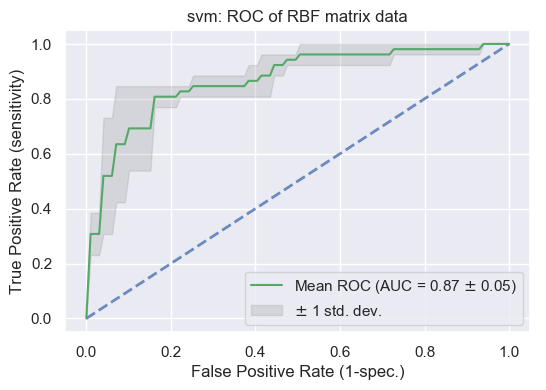

In [14]:
###################################
# rbf with different gammas
###################################

m_auc, st_auc, m_falsePos, m_truePos, TruePosRate = [], [], [], [], []
gam = [0.0001, 0.001, 0.002, 0.005, 0.01, 0.1]
for gamma  in gam:
    classifier_svm = svm.SVC(kernel = 'rbf', gamma = gamma , C = 1000, probability=True)
    temp1, temp2, m_fPos, m_tPos, TPosRate, confu = ROC(reduced_data, y, classifier_svm)
    m_auc.append(temp1)
    st_auc.append(temp2)
    m_falsePos.append(m_fPos)
    m_truePos.append(m_tPos)
    TruePosRate.append(TPosRate)
print(m_auc)  
print('confusion matrix\n', confu)
plot_ROC(m_auc[3], st_auc[3], m_falsePos[3], m_truePos[3], TruePosRate[3], mode = 'RBF', reg = 'svm')


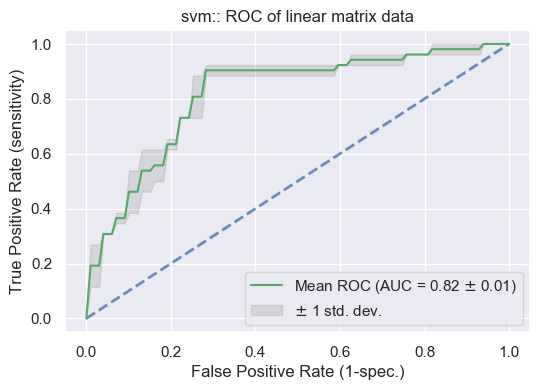

0.8168220668220668
confusion matrix 
 [[49. 15.]
 [14. 38.]]


In [15]:
m_auc, st_auc, m_falsePos, m_truePos, TruePosRate = [], [], [], [], []

###############
#Linear kernel
###############
classifier_svm = svm.SVC(kernel = 'linear', C = 1000, probability=True)
temp1, temp2, m_fPos, m_tPos, TPosRate, confusion_ = ROC(reduced_data, y, classifier_svm)
plot_ROC(temp1, temp2, m_fPos, m_tPos, TPosRate, mode = 'linear', reg = 'svm:')
print(temp1) 
print('confusion matrix \n', confusion_)